In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("FAQ_maif.csv")

In [3]:
df

,faq_type,intent,fist_title,second_title,third_title,question,answer
0,pratique,vehicule/assurance,FAQ Assurance et Vie pratique,Mon véhicule,Assurance,"Cet été, pendant les vacances, je prête ma voi...",Oui. Votre contrat d'assurance auto Vam s'appl...
1,pratique,vehicule/assurance,FAQ Assurance et Vie pratique,Mon véhicule,Assurance,Ma fille entame ses études. Quelles formalités...,"Si vous lui achetez un véhicule, n'oubliez sur..."
2,pratique,vehicule/assurance,FAQ Assurance et Vie pratique,Mon véhicule,Assurance,Je viens de déménager. Quelles sont les démarc...,Vous avez un mois pour déclarer votre changeme...
3,pratique,vehicule/assurance,FAQ Assurance et Vie pratique,Mon véhicule,Assurance,L'un de mes véhicules ne sert pas. Il reste au...,"Oui. En matière d’assurance auto, la législati..."
4,pratique,vehicule/assurance,FAQ Assurance et Vie pratique,Mon véhicule,Assurance,Combien de personnes puis-je transporter dans ...,Vous pouvez transporter dans votre voiture aut...
...,...,...,...,...,...,...,...
363,assistance_tech,espace_personnel/espace_personnel,FAQ Assistance Technique,Espace personnel,Espace personnel,Pourquoi des contrats supprimés sont encore pr...,Tant que la date de résiliation n’est pas pass...
364,assistance_tech,espace_personnel/espace_personnel,FAQ Assistance Technique,Espace personnel,Espace personnel,Comment mettre à jour mes informations personn...,Vous souhaitez modifier vos coordonnées téléph...
365,assistance_tech,espace_personnel/espace_personnel,FAQ Assistance Technique,Espace personnel,Espace personnel,Comment accéder à mon espace de signature élec...,Commencez par regarder dans vos spams puis dan...
366,assistance_tech,espace_personnel/espace_personnel,FAQ Assistance Technique,Espace personnel,Espace personnel,Comment recevoir mon code de validation pour l...,Si vous ne recevez pas votre code de signature...


In [8]:
df["length_question"] = df["question"].apply(lambda l: len(str(l).split()))
df["length_answer"] = df["answer"].apply(lambda l: len(str(l).split()))

# Number of words questions and answers

In [9]:
df.describe()

,length_question,length_answer
count,368.000000,368.000000
mean,12.429348,79.391304
std,6.534787,67.497051
min,1.000000,5.000000
25%,8.000000,32.000000
50%,11.000000,59.000000
75%,15.000000,106.250000
max,53.000000,422.000000


<AxesSubplot:>

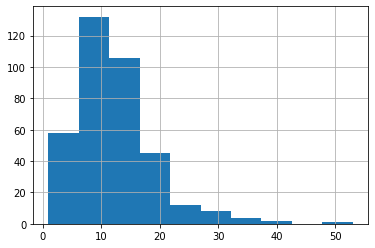

In [10]:
df.length_question.hist()

<AxesSubplot:>

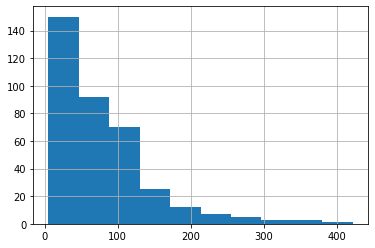

In [11]:
df.length_answer.hist()

# FAQ type

sns.countplot(y="faq_type", data=df)

# Second title counter plot

<AxesSubplot:xlabel='count', ylabel='second_title'>

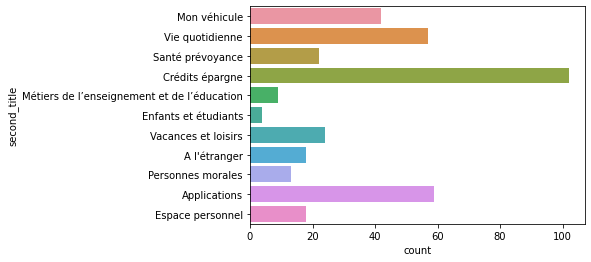

In [15]:
sns.countplot(y="second_title", data=df)

# Number of questions per intent

- If we consider the target per intent, we see that the number of questions per intent is imbalanced

- Very few samples

**Note that intent multiclass classification is a proxy task in order to compare NLU methods**

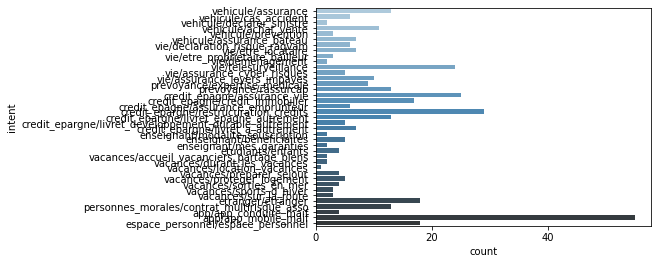

In [16]:
sns.countplot(y="intent", data=df, palette=("Blues_d"))
sns.set_context("poster")

In [27]:
df.second_title.value_counts()

Crédits épargne                                102
Applications                                    59
Vie quotidienne                                 57
Mon véhicule                                    42
Vacances et loisirs                             24
Santé prévoyance                                22
A l'étranger                                    18
Espace personnel                                18
Personnes morales                               13
Métiers de l’enseignement et de l’éducation      9
Enfants et étudiants                             4
Name: second_title, dtype: int64

In [25]:
df.intent.value_counts()

app/app_mobile_maif                                      55
credit_epargne/restrucuration_credits                    29
credit_epagne/assurance_vie                              25
vie/telesurveillance                                     24
espace_personnel/espace_personnel                        18
etranger/etranger                                        18
credit_epagne/credit_immobilier                          17
personnes_morales/contrat_multirisque_asso               13
prevoyance/rassurcap                                     13
vehicule/assurance                                       13
credit_epargne/livret_epagne_autrement                   13
vehicule/achat_vente                                     11
vie/assurance_loyers_impayes                             10
prevoyance/expertise_medicale                             9
vehicule/assurance_bateau                                 7
credit_epargne/livret_a_autrement                         7
vie/etre_locataire                      

In [17]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer 

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stopwords.words('french')).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

# Ngrams in answers

<AxesSubplot:>

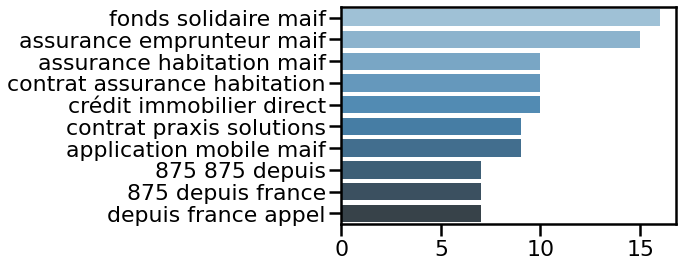

In [20]:
top_trigrams = get_top_ngram(df["answer"],3)
x,y=map(list,zip(*top_trigrams))
sns.barplot(x=y,y=x,palette=("Blues_d"))

<AxesSubplot:>

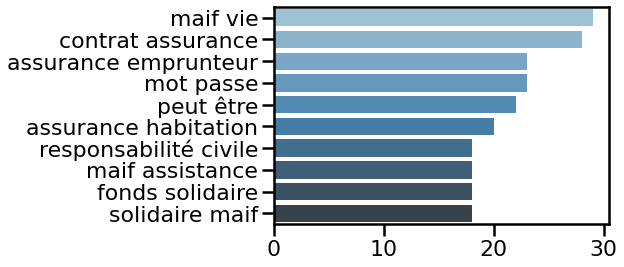

In [21]:
top_trigrams = get_top_ngram(df["answer"],2)
x,y=map(list,zip(*top_trigrams))
sns.barplot(x=y,y=x,palette=("Blues_d"))